In [1]:
import pandas as pd
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import gridspec

# plot the visuals in ipython
%matplotlib inline


{   'dxs': [dG, dA, dL],
    'dxs_str': ['dG', 'dA', 'dL'],
    'eqn_strs': [   'L**2 / (1 + L**2) - 0.01*G + 0.001',
                    'G * ( L/(1+L) - A/(1+A) )',
                    '-G*L / (1+L)'],
    'init_conds': {   'A': 0.0, 'G': 1.0, 'L': 0.0},
    'name': 'Ecoli',
    'noise': 0.01,
    'noise_type': 'percent',
    'params': {   },
    'time_end': 10.0,
    'time_step': 0.1,
    'xs': [G, A, L],
    'xs_str': ['G', 'A', 'L']}
-0.01*G + L**2/(L**2 + 1) + 0.001
G*(-A/(A + 1) + L/(L + 1))
-G*L/(L + 1)


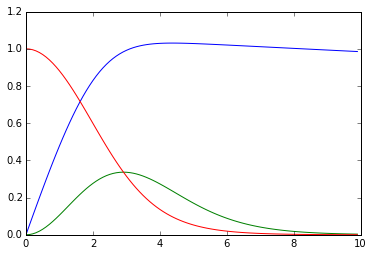

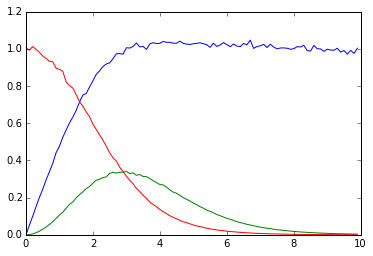

In [3]:
from pypge.benchmarks import diffeq

# Set your output directories
img_dir = "../img/benchmarks/diffeq/"
data_dir = "../data/benchmarks/diffeq/"


params = {
#     'A': 20.0,
#     'B': 10.0,
#     'C': 0.5,
#     'D': 1.0,
#     'U': 4.0,
#     'k': 2.1,
}

init_conds = {
    "G": 1.0,
    "A": 0.0,
    "L": 0.0
},

args = {
    'time_step': 0.1,
    'time_end': 10.0,
    'init_conds': init_conds,
#     'params': params,
    'noise': 0.1
}


# choose your problem here
# prob = diffeq.SimplePendulum(noise=0.025)
# prob = diffeq.ChaoticPendulum(noise=0.01)
# prob = diffeq.BacResp(noise=0.01)
# prob = diffeq.BarMags(noise=0.01)
# prob = diffeq.Glider(noise=0.01)
prob = diffeq.Ecoli(noise=0.01)
# prob = diffeq.Lorenz(noise=0.01)
# prob = diffeq.ShearFlow(noise=0.01)
# prob = diffeq.vanDerPol(noise=0.01)
# prob = diffeq.PredPreyFrac(noise=0.01)
# prob = diffeq.LotkaVolterra(noise=0.01)

# prob = diffeq.ShearFlow(**args)

t_pts  = prob['time_pts']
 
for xpts in prob['xs_pure']:
    plt.plot(t_pts,xpts)
plt.savefig(img_dir + prob['name'].lower() + "_clean.png", dpi=200)
plt.show()

for npts in prob['xs_pts']:
    plt.plot(t_pts,npts)
plt.savefig(img_dir + prob['name'].lower() + "_noisy.png", dpi=200)
plt.show()


{   'dxs': [D_G, D_A, D_L],
    'dxs_str': ['D_G', 'D_A', 'D_L'],
    'eqn_strs': [   'L**2 / (1 + L**2) - 0.01*G + 0.001',
                    'G * ( L/(1+L) - A/(1+A) )',
                    '-G*L / (1+L)'],
    'init_conds': {   'A': 0.0, 'G': 1.0, 'L': 0.0},
    'name': 'Ecoli',
    'noise': 1e-07,
    'noise_type': 'percent',
    'params': {   },
    'time_end': 10.0,
    'time_step': 0.01,
    'xs': [G, A, L],
    'xs_str': ['G', 'A', 'L']}
-0.01*G + L**2/(L**2 + 1) + 0.001
G*(-A/(A + 1) + L/(L + 1))
-G*L/(L + 1)
NUM POINTS:  1000
1000 1000
1000 1000
1000 1000


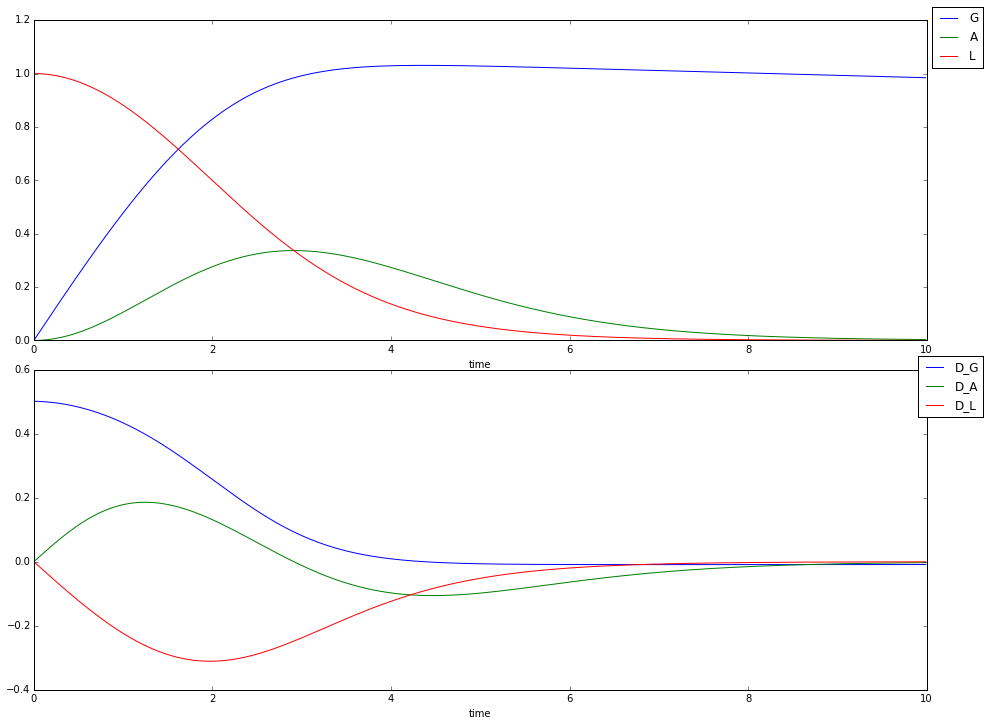

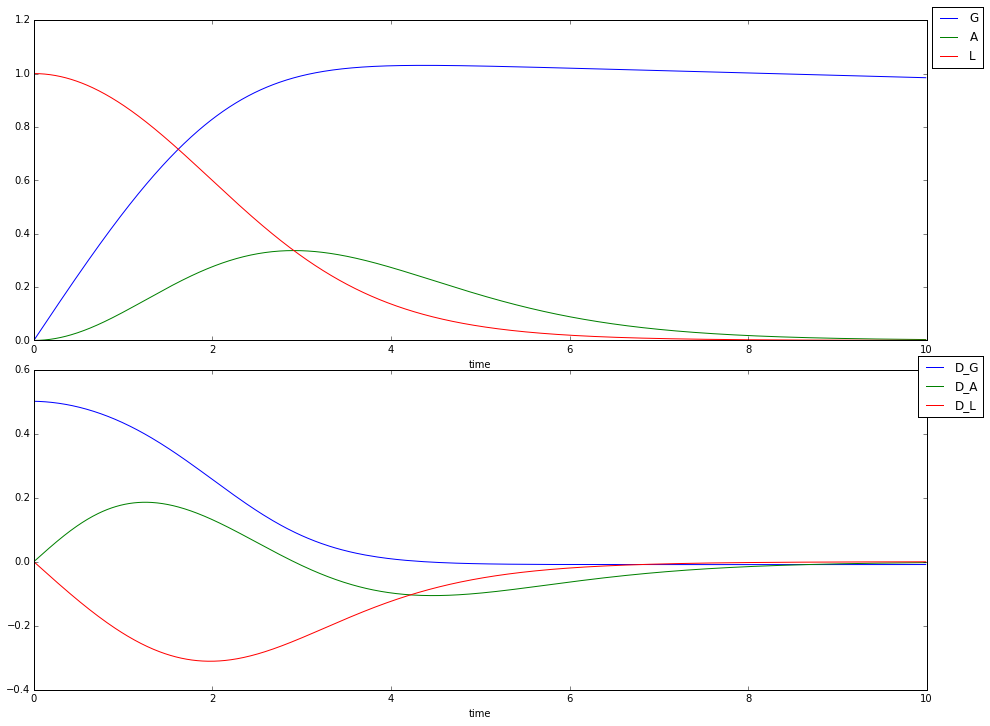

In [5]:
from pypge.benchmarks import diffeq

# Set your output directories
img_dir = "../img/benchmarks/diffeq/"
data_dir = "../data/benchmarks/diffeq/"

args = {
    'time_step': 0.01,
    'time_end': 10.0,
}

# prob = diffeq.BacResp(noise=0.1)
# prob = diffeq.BarMags(noise=0.1)
# prob = diffeq.Glider(noise=0.1)
prob = diffeq.Ecoli(noise=0.0000001, **args)
# prob = diffeq.Lorenz(noise=0.1)
# prob = diffeq.ShearFlow(noise=0.1)
# prob = diffeq.vanDerPol(noise=0.1)
# prob = diffeq.PredPreyFrac(noise=0.01)
# prob = diffeq.LotkaVolterra(noise=0.1)
# prob = diffeq.SimplePendulum(noise=0.1)
# prob = diffeq.ChaoticPendulum(noise=0.1)


t_pts  = prob['time_pts']
NPTS = len(t_pts)
print "NUM POINTS: ", NPTS
dT = t_pts[1]

data = [t_pts]

fig = plt.figure()
fig.set_size_inches(16, 12)
gs = gridspec.GridSpec(4, 2)

ax1 = fig.add_subplot(gs[0:2,:])
for i,xpts in enumerate(prob['xs_pure']):
    data += [xpts]
    ax1.plot(t_pts,xpts, label=prob['xs_str'][i])
ax1.set_xlabel('time')
plt.legend(bbox_to_anchor=(1.07, 1.06))

ax2 = fig.add_subplot(gs[2:,:])
for i,xpts in enumerate(prob['xs_pure']):
    deriv = np.gradient(xpts, dT)
    data += [deriv]
    print len(t_pts), len(deriv)
    ax2.plot(t_pts,deriv, label=prob['dxs_str'][i])
ax2.set_xlabel('time')
plt.legend(bbox_to_anchor=(1.07, 1.06))
plt.savefig(img_dir + prob['name'].lower() + "_clean.png", dpi=200)
plt.show()

data = np.array(data).T

cols = list(['T'] + prob['xs_str'] + prob['dxs_str'])
out_data = data.tolist()

f_csv = open(data_dir + prob['name'].lower() + "_clean_" + str(NPTS) +".csv", 'w')
colstr = ", ".join(cols) + "\n"
f_csv.write(colstr)
for row in out_data:
    line = ", ".join([str(col) for col in row]) + "\n"
    f_csv.write(line)
f_csv.close()




data = [t_pts]

fig = plt.figure()
fig.set_size_inches(16, 12)
gs = gridspec.GridSpec(4, 2)

ax1 = fig.add_subplot(gs[0:2,:])
for i,xpts in enumerate(prob['xs_pts']):
    data += [xpts]
    ax1.plot(t_pts,xpts, label=prob['xs_str'][i])
ax1.set_xlabel('time')
plt.legend(bbox_to_anchor=(1.07, 1.06))

ax2 = fig.add_subplot(gs[2:,:])
for i,xpts in enumerate(prob['xs_pts']):
    deriv = np.gradient(xpts,dT)
    data += [deriv]
    ax2.plot(t_pts,deriv, label=prob['dxs_str'][i])
ax2.set_xlabel('time')
plt.legend(bbox_to_anchor=(1.07, 1.06))
plt.savefig(img_dir + prob['name'].lower() + "_noisy.png", dpi=200)
plt.show()

data = np.array(data).T

cols = list(['T'] + prob['xs_str'] + prob['dxs_str'])
out_data = data.tolist()

f_csv = open(data_dir + prob['name'].lower() + "_noisy.csv", 'w')
colstr = ", ".join(cols) + "\n"
f_csv.write(colstr)
for row in out_data:
    line = ", ".join([str(col) for col in row]) + "\n"
    f_csv.write(line)
f_csv.close()






